`machine learning course 2025 (с) mssvctr`

### Домашнее задание 1

**Titanic challenge** - самое известное соревнование по Data Science

Используйте данные о пассажирах Титаника, чтобы построить свой классификатор, который предсказывает вероятность гибели пассажира на печально известном корабле

#### Шаг 1: импорт библиотек

Заполните плейсхолдеры

In [17]:
# импортируйте pandas, numpy, seaborn и matplotlib
# не забывайте о том, что каждая из этих библиотек
# использует свои сокращения

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# далее мы импортируем миллион методов из scikit-learn
# эта часть уже выполнена, ура!

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Шаг 2: загружаем данные с Титаника

In [18]:
# выгрузим датасет напрямую с URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# выведите первые 5 строк датасета
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Шаг 3: анализ данных

Опишите данные и укажите в комментариях к коду ответы на вопросы:

1. выведите df.info()
  - в каких столбцах есть NaN'ы?
  - ориентируясь на количество NaN'ов в столбцах, определите, какие строки "не жалко" выбросить, а какие лучше сохранить
2. визуализируйте распределение классов по столбцу `Survived`
  - сбалансировали ли классы в нашем датасете?
3. выведите список столбцов, в которых представлены категориальные данные
  - почему категориальные данные нужно будет обработать перед запуском обучения модели?

In [11]:
#1
df.info()

# NaN'ы есть в столбцах 'Age', 'Cabin' и 'Embarked'. Данные 'Age' (177 NaN'ов) важны для анализа, поэтому их лучше дополнить. Данных 'Cabin' (687 NaN'ов) очень мало, и они не сильно повлияют на результат анализа, поэтому эти значения можно выбросить. Данным 'Embarked' нехватает всего 2х значений, поэтому строки с отсутствующими значениями можно удалить.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


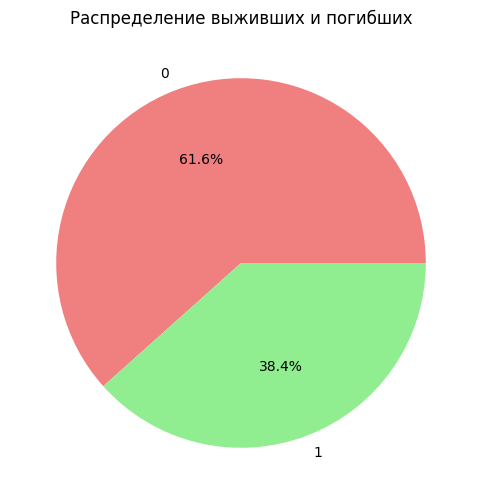

In [12]:
#2
plt.figure(figsize=(6, 6))
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Распределение выживших и погибших')
plt.ylabel('')
plt.show()

# Данные не сбалансированы. Выживших пассажиров на 22.2 % меньше погиших


In [13]:
#3
df[['Pclass', 'Fare', 'Age', 'Parch', 'Sex', 'Survived', 'Embarked', 'SibSp']].head()

# Категориальные данные нужно обработать перед обучением модели, потому что большинство алгоритмов обучения работают с числовыми данными


,Pclass,Fare,Age,Parch,Sex,Survived,Embarked,SibSp
0,3,7.2500,22.0,0,male,0,S,1
1,1,71.2833,38.0,0,female,1,C,1
2,3,7.9250,26.0,0,female,1,S,0
3,1,53.1000,35.0,0,female,1,S,1
4,3,8.0500,35.0,0,male,0,S,0


#### Шаг 4: анализ данных

Ответы на эти вопросы помогут вам принять решения для препроцессинга данных:

- требуется ли балансировка классов? - *Балансировка классов важна, чтобы у обученной модели не было предвзятости к одной из категорий*
- какие столбцы нужно дропнуть? - *Нужно дропнуть столбцы "Name", "PassengerID", "Ticket" и "Cabin", так как эти данные не влияют на вероятность выживания*
- какие данные нужно преобразовать к виду числовых? - *Все, которые к ним не относятся: "Sex", "Embarked" и т.д.*

**Дропаем столбцы**

Оставим классы в покое и сразу перейдем к очистке таблицы

Есть два пути:

- дропнуть "лишние" столбцы из исходной таблицы
- создать новую таблицу, в которую мы занесем только "нужные" столбцы

Выберите любой способ и создайте новый датафрейм, очищенный от неинформативных столбцов, в которых много NaN'ов

In [19]:
df = df[[ 'Survived', 'Sex', 'Age', 'Pclass', 'Fare', 'Parch', 'SibSp', 'Embarked']]

In [17]:
# очищенная таблица

df.head()

,Survived,Sex,Age,Pclass,Fare,Parch,SibSp,Embarked
0,0,male,22.0,3,7.2500,0,1,S
1,1,female,38.0,1,71.2833,0,1,C
2,1,female,26.0,3,7.9250,0,0,S
3,1,female,35.0,1,53.1000,0,1,S
4,0,male,35.0,3,8.0500,0,0,S


**Categorical --> Numerical**

Для преобразования категориальных данных к виду чисел, в sklearn используется метод `LabelEncoder`

- документация [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

Метод автоматически заменяет категориальные метки на целые числа

In [ ]:
# образец кодирования столбца 'Sex' с LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 0 = female, 1 = male
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,S,0
1,1,0,38.0,1,0,71.2833,C,1
2,3,0,26.0,0,0,7.9250,S,1
3,1,0,35.0,1,0,53.1000,S,1
4,3,1,35.0,0,0,8.0500,S,0


Рассмотрим еще один метод: мы имитируем one-hot encoding с помощью метода `get_dummies` из Pandas

- [документация метода](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

Принцип работы one-hot-encoding:

- как мы закодируем цифры 1 и 9, чтобы получить разреженный массив?
- создаем матрицу из двух векторов размерностью 10
  ```
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] # цифра 1
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] # цифра 9
  ```
- единица означает позицию цифры в ряде `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`
- также:
  - единица означает `True` (число находится в этой позиции)
  - ноль означает `False` (число не находится в этой позиции)

При использовании этого метода в датафреймах, мы также создаем три новых столбца (три новых вектора), в которых помечаем `True` соответствие данной метке

In [ ]:
# образец кодирования столбца 'Embarked' с get_dummies
# в Embarked у нас три метки: C, Q, S
# метки означают станцию посадки данного пассажира
df = pd.get_dummies(df, columns=['Embarked'])  # one-hot encoding
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,False,False,True
1,1,0,38.0,1,0,71.2833,1,True,False,False
2,3,0,26.0,0,0,7.9250,1,False,False,True
3,1,0,35.0,1,0,53.1000,1,False,False,True
4,3,1,35.0,0,0,8.0500,0,False,False,True


Теперь обновите ваш датафрейм: замените с использованием изученных методов категориальные данные на числовые

Изучите документацию и найдите дополнительные материалы, ответьте на вопрос: чем `LabelEncoder` отличается от `get_dummies` и когда какой метод лучше использовать?

In [20]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Embarked'])
df.head()

# LabelEncoder преобразует каждую категорию в уникальное число (male - 0, female - 1). Подходит, если нам нужно оставить один столбец. Его лучше использовать с бинарными или порядковыми категориями. Не подойдет, если у категорий нет порядка, тогда модель запутается.

# get_dummies имитирует one-hot encoding, преобразует категории в бинарные признаки (отдельные столбцы). Подходит для номинальных категорий, где нет порядка. Его лучше использовать, когда номинальных категорий немного, чтобы не создавалось большое количество столбцов.

,Survived,Sex,Age,Pclass,Fare,Parch,SibSp,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.0,3,7.2500,0,1,False,False,True
1,1,0,38.0,1,71.2833,0,1,True,False,False
2,1,0,26.0,3,7.9250,0,0,False,False,True
3,1,0,35.0,1,53.1000,0,1,False,False,True
4,0,1,35.0,3,8.0500,0,0,False,False,True


**Заполняем пропуски**

Мы убрали лишние столбцы, но NaN'ы по-прежнему есть в нашем датафрейме

Рассмотрим метод `SimpleImputer` из sklearn для заполнения пропусков в данных

- [документация SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [21]:
# заполняем пропуски в столбце Age
imputer = SimpleImputer(strategy="mean")
df['Age'] = imputer.fit_transform(df[['Age']])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   Pclass      891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Parch       891 non-null    int64  
 6   SibSp       891 non-null    int64  
 7   Embarked_C  891 non-null    bool   
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 51.5 KB


Изучите документацию sklearn и ответьте на вопросы: какие стратегии доступы для работы с методом SimpleImputer? Чем они отличаются? Какие стратегии подойдут для работы с категориальными данными?

Существуют следующие стратегии в методе SimpleImputer: `mean, median, most_frequent, constant`.



*   `mean`: заполняет пропуски средним значением, подходит для числовых значений без выбросов;
*   `median`: заполняет пропуски медианным значением, также подходит для числовых значений с выбросами;
*   `most_frequent`: заполняет пропуски самыми частотными значениями в столбце, подходит как для числовых, так и для категориальных значений;
*   `constant`: заполняет пропуски постоянным значением, которое указывается в параметре `fill_value`

Для категориальных данных подойдут стратегии `most_frequent` и `constant`. Другие стратегии работают только с числовыми значениями.



**Feature Engineering**

> Данные - это пища для вашей модели

Слишком шумные данные вызовут отравление модели (кстати, один из методов киберпреступности, построенный на работе с данными, так и называется - data poisoning!)

Недостаточность в данных может стать причиной недообучения (underfitting), поэтому мы можем не только дропать, но и добавлять фичи, т.е. признаки, на которых будет учиться наша модель

Этот процесс называется **feature engineering**

In [22]:
# Добавим фичу Family size = SibSp + Parch + 1 (единица обозначает самого пассажира)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Фича Alone для тех, кто путешествует один
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df.head(10)

,Survived,Sex,Age,Pclass,Fare,Parch,SibSp,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,1,22.000000,3,7.2500,0,1,False,False,True,2,0
1,1,0,38.000000,1,71.2833,0,1,True,False,False,2,0
2,1,0,26.000000,3,7.9250,0,0,False,False,True,1,1
3,1,0,35.000000,1,53.1000,0,1,False,False,True,2,0
4,0,1,35.000000,3,8.0500,0,0,False,False,True,1,1
5,0,1,29.699118,3,8.4583,0,0,False,True,False,1,1
6,0,1,54.000000,1,51.8625,0,0,False,False,True,1,1
7,0,1,2.000000,3,21.0750,1,3,False,False,True,5,0
8,1,0,27.000000,3,11.1333,2,0,False,False,True,3,0
9,1,0,14.000000,2,30.0708,0,1,True,False,False,2,0


Добавьте любую новую фичу в датафрейм, которая легко выводится из данных

Например, можно вытащить обращения к пассажирам из столбца `Name` из исходной таблицы: `Mr., Mrs., Dr.`

Для этого изучите внимательно данные, познакомьтесь с описанием датасета на Kaggle

- https://www.kaggle.com/c/titanic/

Вам нужно самостоятельно решить, что можно извлечь из этих данных, как назвать новую фичу и избавиться от категориальных меток

In [27]:
# Я решила добавить столбец с распределением на возрастные категории ('Child', 'Teen', 'Young', 'Adult', 'Elderly')

bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young', 'Adult', 'Elderly']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

df.head(10)

,Survived,Sex,Age,Pclass,Fare,Parch,SibSp,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,AgeGroup
0,0,1,22.000000,3,7.2500,0,1,False,False,True,2,0,Young
1,1,0,38.000000,1,71.2833,0,1,True,False,False,2,0,Adult
2,1,0,26.000000,3,7.9250,0,0,False,False,True,1,1,Young
3,1,0,35.000000,1,53.1000,0,1,False,False,True,2,0,Young
4,0,1,35.000000,3,8.0500,0,0,False,False,True,1,1,Young
5,0,1,29.699118,3,8.4583,0,0,False,True,False,1,1,Young
6,0,1,54.000000,1,51.8625,0,0,False,False,True,1,1,Adult
7,0,1,2.000000,3,21.0750,1,3,False,False,True,5,0,Child
8,1,0,27.000000,3,11.1333,2,0,False,False,True,3,0,Young
9,1,0,14.000000,2,30.0708,0,1,True,False,False,2,0,Teen


In [28]:
# Преобразование категориальных значений в числовые
df = pd.get_dummies(df, columns=['AgeGroup'])
df.head(15)

,Survived,Sex,Age,Pclass,Fare,Parch,SibSp,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Young,AgeGroup_Adult,AgeGroup_Elderly
0,0,1,22.000000,3,7.2500,0,1,False,False,True,2,0,False,False,True,False,False
1,1,0,38.000000,1,71.2833,0,1,True,False,False,2,0,False,False,False,True,False
2,1,0,26.000000,3,7.9250,0,0,False,False,True,1,1,False,False,True,False,False
3,1,0,35.000000,1,53.1000,0,1,False,False,True,2,0,False,False,True,False,False
4,0,1,35.000000,3,8.0500,0,0,False,False,True,1,1,False,False,True,False,False
5,0,1,29.699118,3,8.4583,0,0,False,True,False,1,1,False,False,True,False,False
6,0,1,54.000000,1,51.8625,0,0,False,False,True,1,1,False,False,False,True,False
7,0,1,2.000000,3,21.0750,1,3,False,False,True,5,0,True,False,False,False,False
8,1,0,27.000000,3,11.1333,2,0,False,False,True,3,0,False,False,True,False,False
9,1,0,14.000000,2,30.0708,0,1,True,False,False,2,0,False,True,False,False,False


#### Шаг 4: обучение

Создаем пары `data - label`

In [29]:
X = df.drop(columns=['Survived']) # данные = все столбцы кроме метки Survived
y = df['Survived'] # метки = только столбец Survived

Вспомните прошлое занятие: примените метод `train_test_split`

Создайте 2 выборки данных в соотношении 80 на 20

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Изучите информацию о том, как работает логистическая регрессия и ответьте на вопрос: какую роль играет `StandardScaler` в работе с логистической регрессией?

*`StandardScaler` стандартизирует данные, приводя их к единому масштабу. Это необходимо для стабильности модели, ускорения сходимости и удобства интерпретации.*

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучение, как и в случае работы с линейной регрессией, займет всего пару строк

Опишите основной принцип работы логистической регрессии своими словами (2-3 предложения достаточно)

Предварительно изучите материал: https://web.stanford.edu/~jurafsky/slp3/5.pdf


*Основной принцип логической регрессии в предсказации результата за счет бинарной классификации. Например, если в линейной регрессии на выход мы получаем конкретный результат, то в логистической регрессии мы получим вероятность получения конкретного результата. В этом нам помогает сигмоидная функция.*

In [32]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# предсказания
y_pred_log = log_reg.predict(X_test_scaled)

# вывод репорта
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Performance:
Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Повторим магию и обучим наивные байесовский классификатор. Что значит `Gaussian` в названии метода `GaussianNB`? Изучите документацию метода, чтобы ответить на этот вопрос

*`Gaussian` в названии метода `GaussianNB` указывает на то, что метод использует гауссово (нормальное) распределение для моделирования вероятностей признаков.*

Почему для этого метода не нужен `StandardScaler`?

*Наивный Байес предполагает, что признаки условно независимы. Масштабирование не нарушает это предположение. Метод `GaussianNB` работает с распределениями вероятностей, а не с расстояниями или градиентами (как в логистической регрессии). Также в `GaussianNB` уже учитывается масштаб данных через стандартное отклонение*

In [33]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naïve Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naïve Bayes Performance:
Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       105
           1       0.75      0.80      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179



Мы молодцы! Отрисуем результат с помощью матрицы ошибок

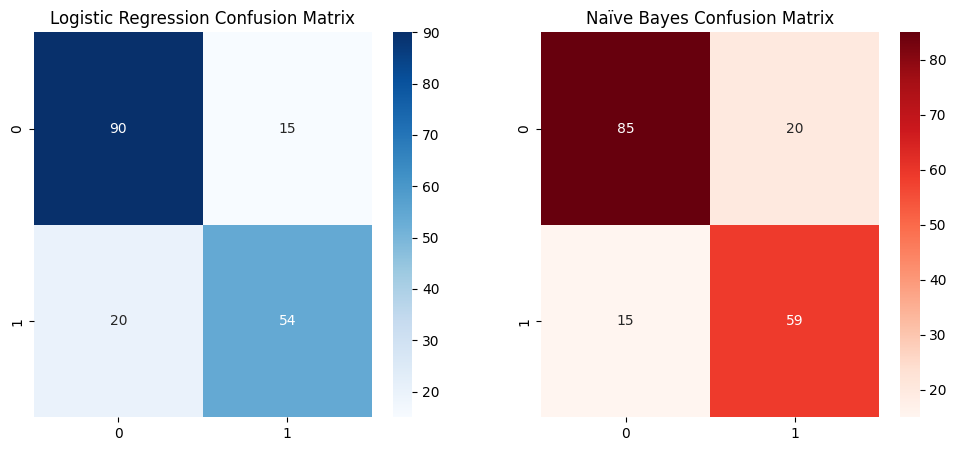

In [34]:
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")

sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Reds", ax=axes[1])
axes[1].set_title("Naïve Bayes Confusion Matrix")

plt.show()